<a href="https://colab.research.google.com/github/Weifan-Lu/TiMEpy/blob/main/Simple_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TiMEpy: A Python Package for Analyzing **Ti**dal **M**odulation of Fast and Slow **E**arthquakes

This guide provides the steps to quickly install and run TiMEpy, a Python-based project for processing and analyzing tidal phase data.



---


## 1. Environment Setup
*   Python Version: Ensure you have Python 3.6 or higher installed.
*   Package Manager: Use pip or conda to manage dependencies.




## 2. Clone the Repository

Clone the TiMEpy repository from GitHub (or your preferred repository host) using the following commands:

In [1]:
!git clone https://github.com/Weifan-Lu/TiMEpy

Cloning into 'TiMEpy'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 194 (delta 95), reused 115 (delta 42), pack-reused 0 (from 0)
Receiving objects: 100% (194/194), 24.59 MiB | 14.77 MiB/s, done.
Resolving deltas: 100% (95/95), done.




---


## 3. Install Dependencies

Install all required Python packages. In the project root directory, run:

In [8]:
!pip install cartopy numpy matplotlib scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 74.9 MB/s eta 0:00:00


## 4. Configure the Project

Before running the scripts, adjust the configuration settings in the configuration file (e.g., input_params_rc.py). Update parameters such as:

*   Data file paths
*   Output directories
*   Time ranges
*   Ensure that all paths and parameters reflect your local setup.


## 5. Run TiMEpy

  In this example, we use the Ridgestcrest earthquake case.

  The ***main_run.py*** script can either run the entire program at once.

  For illustration purposes, here are the individual steps to run each component independently.

### 5.0 Creating Output Folder

In [5]:
%cd TiMEpy/ex_ridgecrest

/content/TiMEpy/ex_ridgecrest


In [6]:
!python ex_pre0_create_output.py

src_path = /content/TiMEpy/config
====== Processing | Creating Output Folder: Start ======
Created folder: ../ex_ridgecrest/output
Created folder: ../ex_ridgecrest/output/catalog
Created folder: ../ex_ridgecrest/output/tidal_phase
Created folder: ../ex_ridgecrest/output/stress
Created folder: ../ex_ridgecrest/output/figure
====== Processing | Creating output folder: End ======


###  5.1 Select catalog

In [10]:
!python ex_pre1_select_catalog.py

src_path = /content/TiMEpy/config
====== Processing | Select catalog: Start ======
Selected catalog have been written to ../ex_ridgecrest/output/catalog/RC_select_catalog.txt
The selected catalog has been successfully plotted and saved to ../ex_ridgecrest/output/catalog/RC_select_catalog.png
====== Processing | Select catalog: End ======


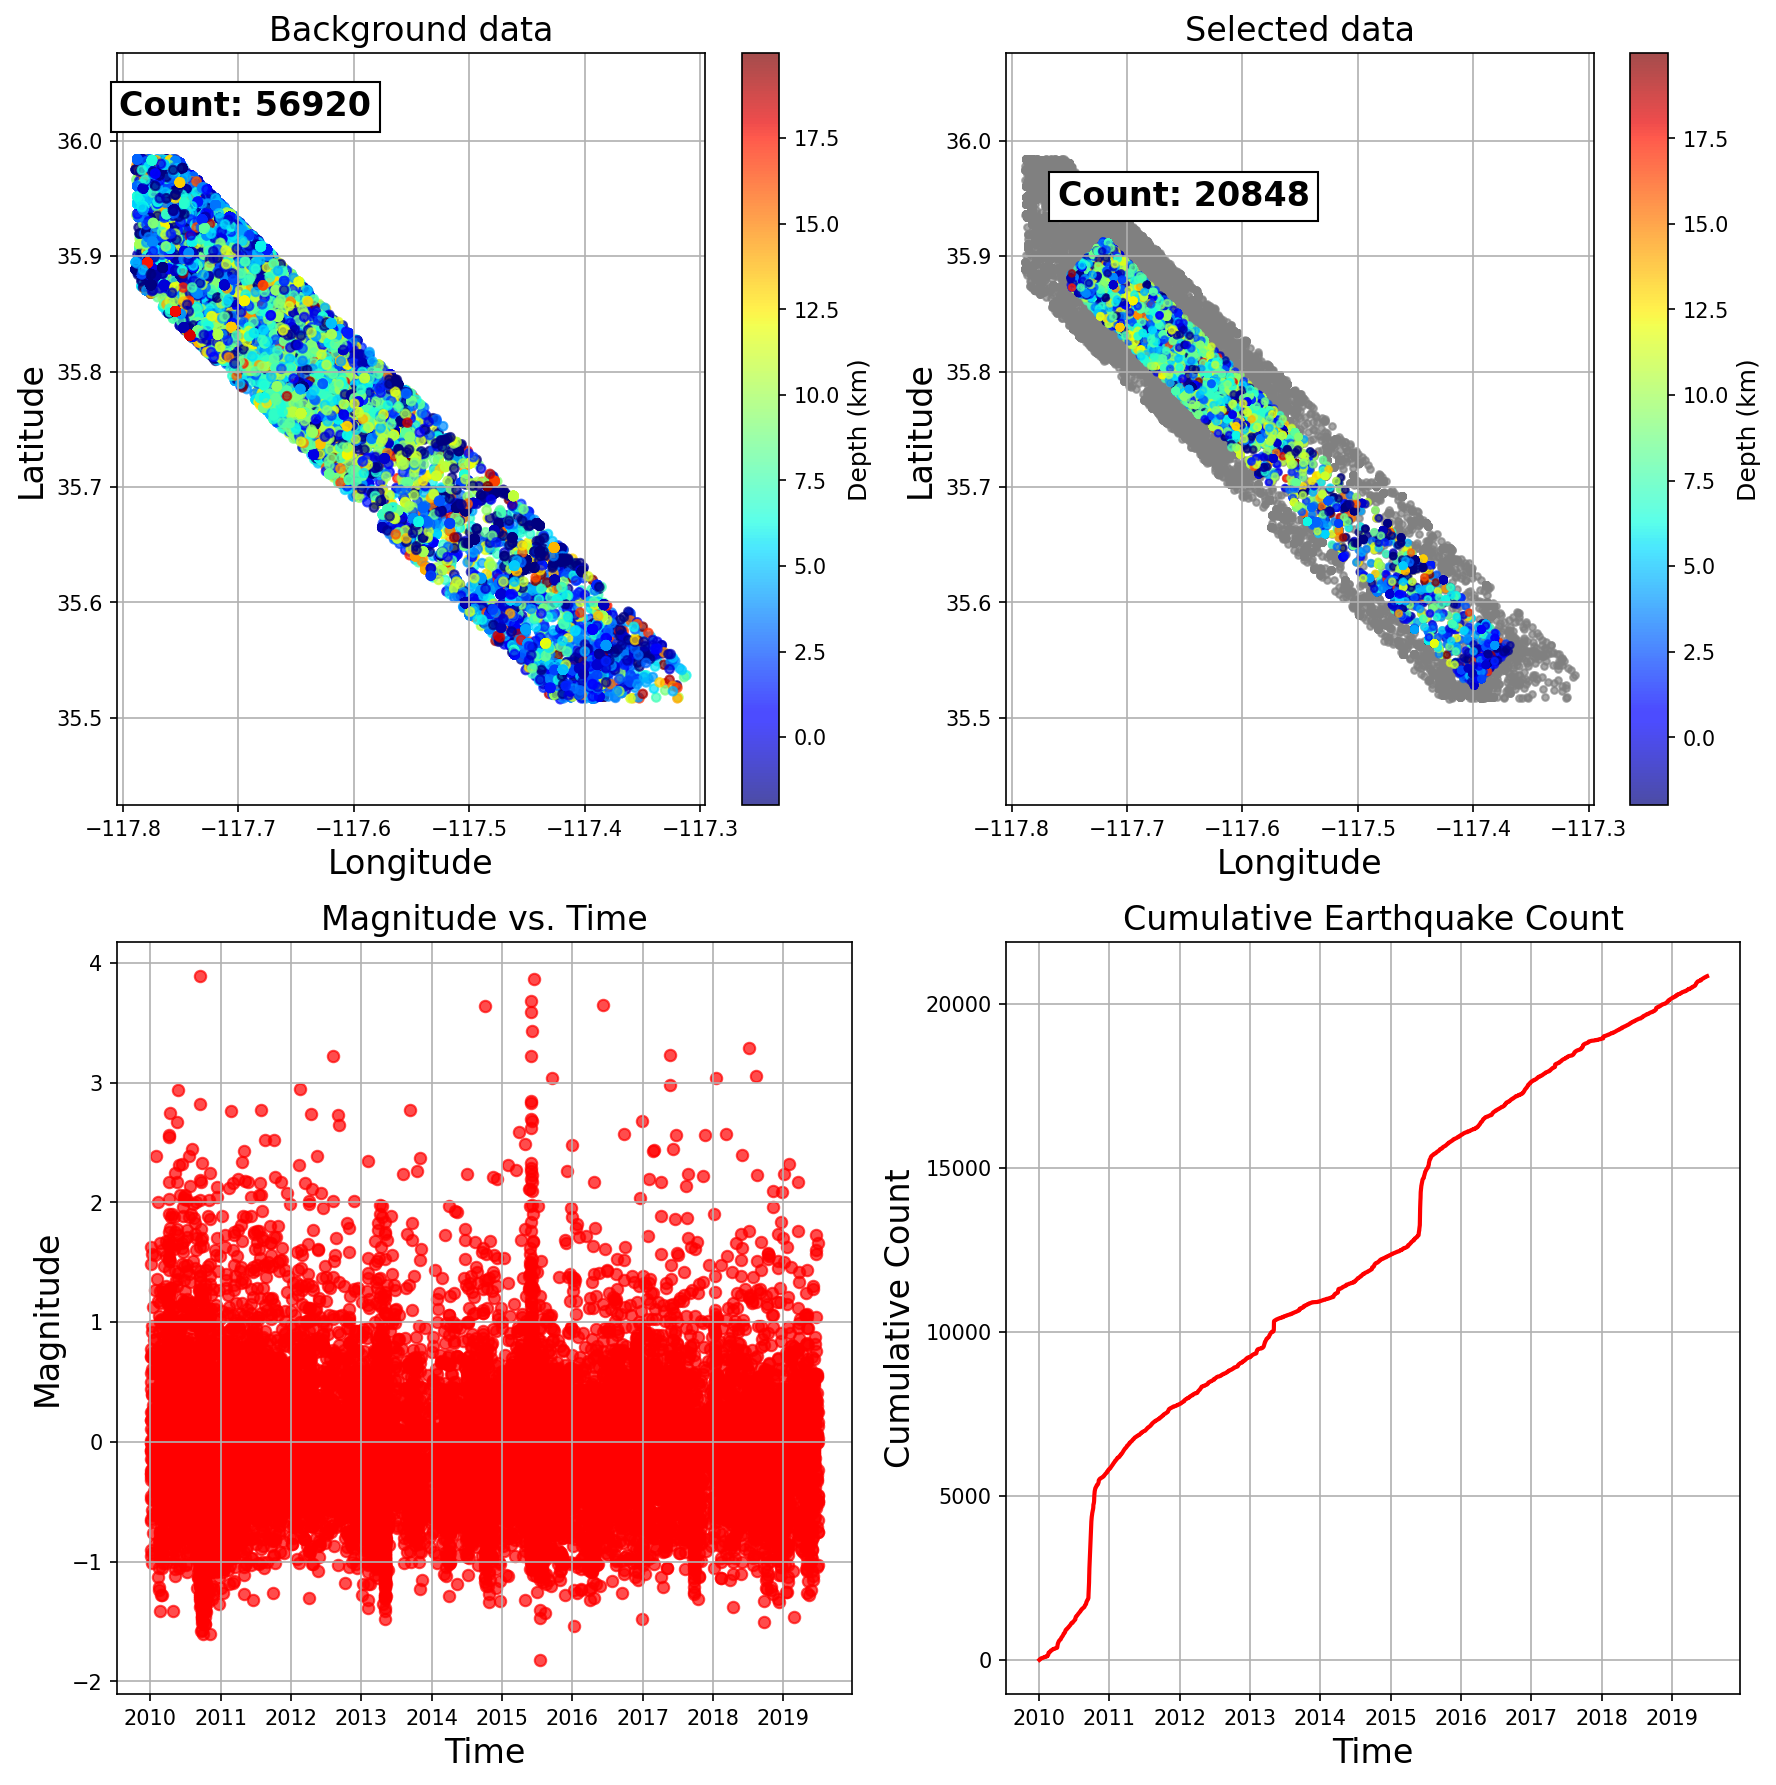

###  5.2 Declustering catalog (Using Nearest-Neighbor Algorithm )

***Input:***
    
    output/catalog/$name_select_catalog.txt

***Output:***
    
    1)	output/catalog/$name_select_catalog_decluster.txt
    2)	output/catalog/$name_select_catalog_decluster_dataobj.npy
    3)	output/figures/$name_decluster_catalog_lat.png
    4)	figures/$name_decluster_catalog_nna.png
    5)	figures/$name_decluster_catalog_cum.png

In [11]:
!python ex_pre2_decluster_NNA.py

src_path = /content/TiMEpy/config
====== Processing | Decluster catalog: Start ======
Declustered catalog have been written to ../ex_ridgecrest/output/catalog/RC_select_catalog_decluster.txt
====== Processing | Decluster catalog: plot figures ======
The declustered catalog has been successfully plotted and saved to ../ex_ridgecrest/output/catalog/RC_decluster_catalog_cum.png
The declustered catalog has been successfully plotted and saved to ../ex_ridgecrest/output/catalog/RC_decluster_catalog_lat.png
The declustered catalog has been successfully plotted and saved to ../ex_ridgecrest/output/catalog/RC_decluster_catalog_nna.png
====== Processing | Decluster catalog: End ======


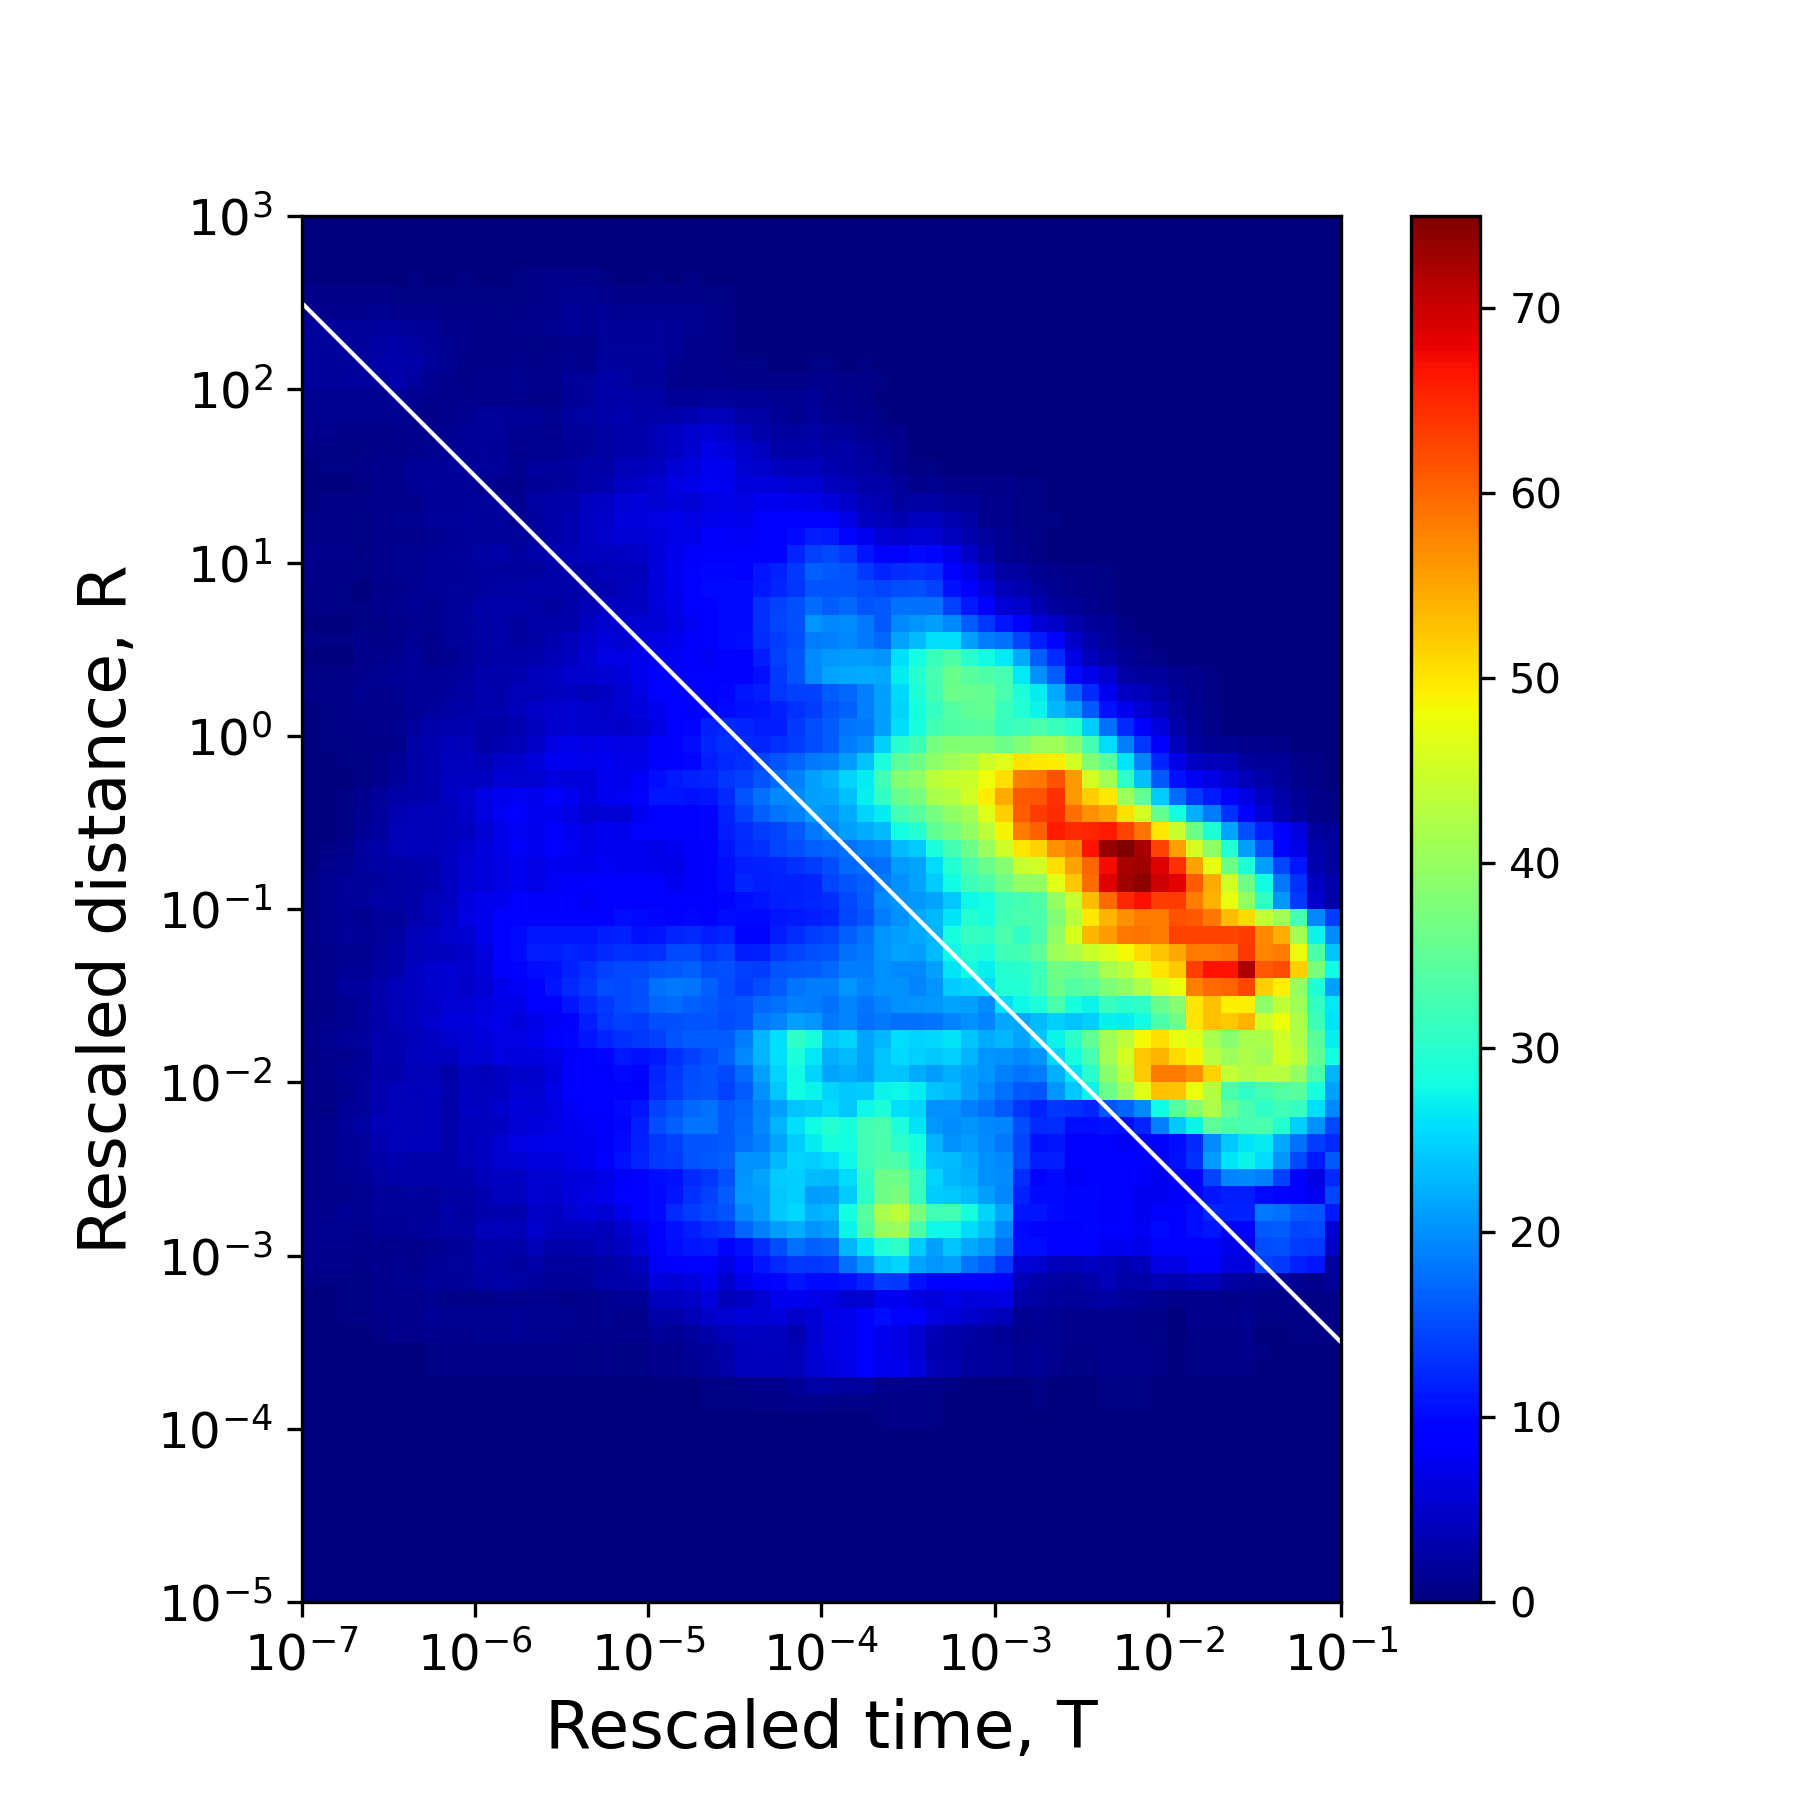

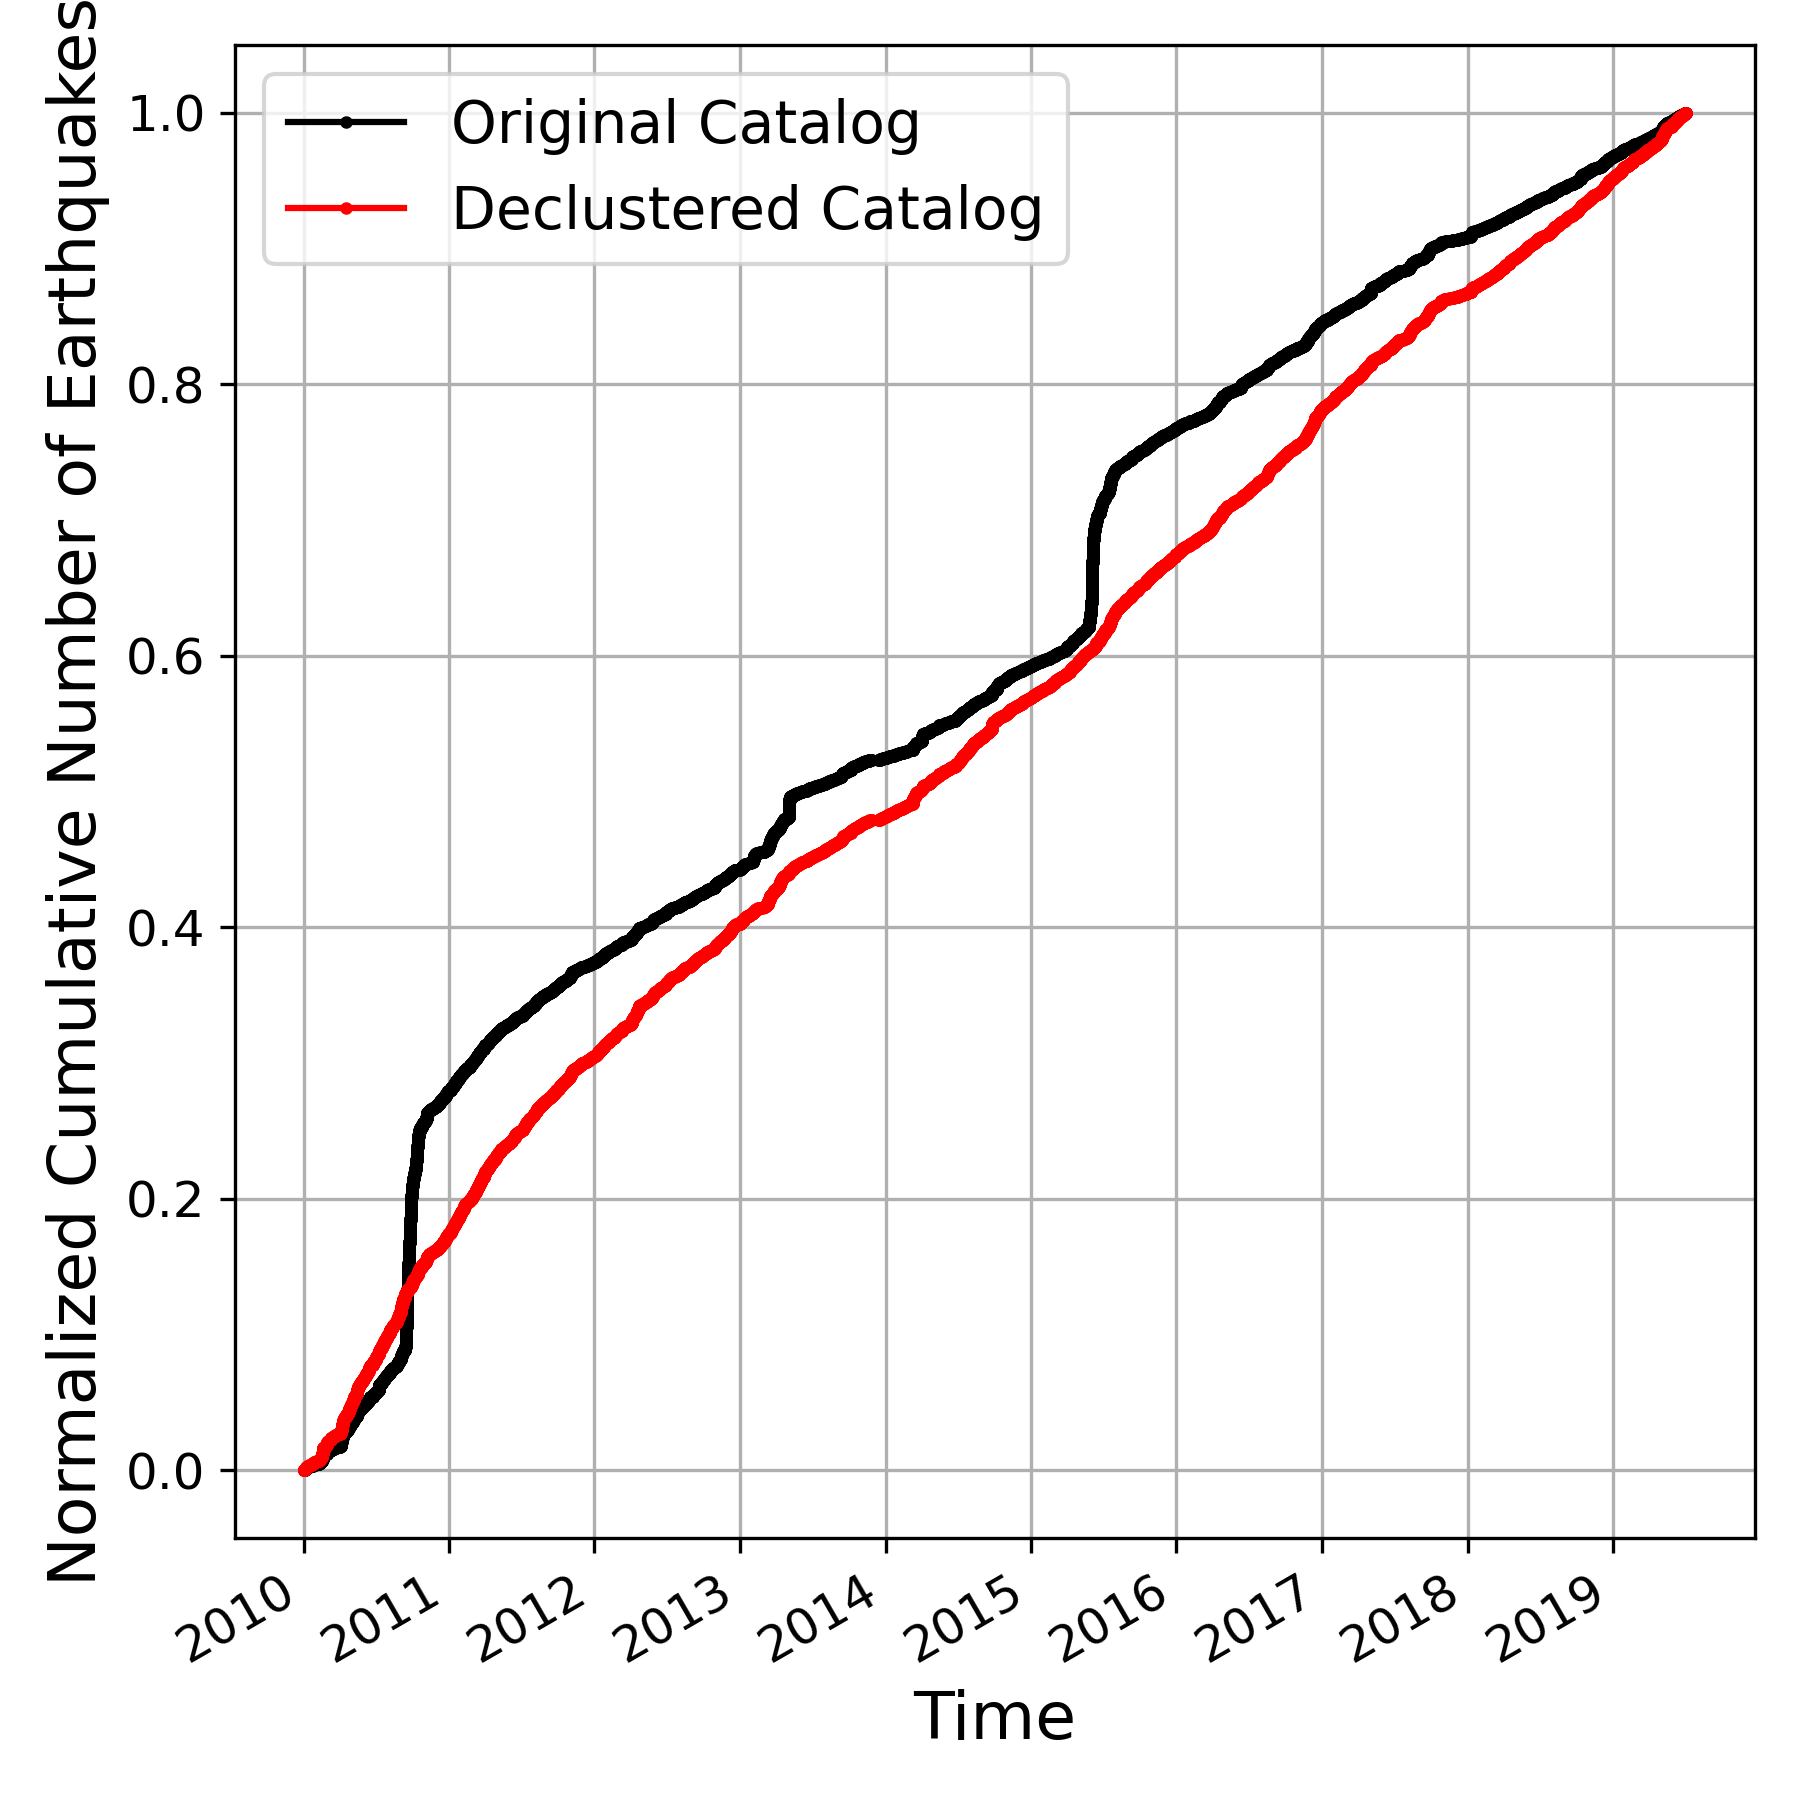

###    5.3 Strain to Stress

***Input:***
    
    input/solid-ocean.out

***Output:***
    
    output/stress/$name_stress_Vol_N_S.txt

In [12]:
!python ex_pre3_strain_to_stress.py

src_path = /content/TiMEpy/config
====== Processing | Strin to Stress: Start ======
rr = 6359.0, i = 11
34.2 26.6 12.000 5.80 3.20 2.60
Stress results have been written to ../ex_ridgecrest/output/stress/RC_stress_Vol_N_S.txt
====== Processing | Strin to Stress: End ======


###    5.4  Earthquakes are associated with tidal stresses

***Input:***
    
    1)catalog
    opt = 1: fast earthquakes
      -	output/catalog/$name_select_catalog_decluster.txt
    else: slow earthquakes
      -	output/catalog/$name_select_catalog.txt
    2)stress
    output/stress/$name_stress_Vol_N_S.txt

***Output:***
    
Four files containing the phases and levels of observed earthquake events:
    
    output/tidal_phase/$name_phase_stress_obs_CFS.txt
    output/tidal_phase/$name_phase_stress_obs_N.txt
    output/tidal_phase/$name_phase_stress_obs_S.txt
    output/tidal_phase/$name_phase_stress_obs_Vol.txt


Four files containing the phases and levels of reference (background) earthquake events:

    output/tidal_phase/$name_phase_stress_ref_CFS.txt
    output/tidal_phase/$name_phase_stress_ref_N.txt
    output/tidal_phase/$name_phase_stress_ref_S.txt
    output/tidal_phase/$name_phase_stress_ref_Vol.txt


In [ ]:
!python ex_ana1_calc_tidal_phase.py

src_path = /content/TiMEpy/config
====== Analysis | Earthquakes are associated with tidal stresses: Start ======
Start calculating the phase of the tide (Obs)
start time: 2010-01-01 00:00:00   end time:  2019-07-03 00:00:00  len_stress:  927361 len_time:  927361
Plot stress v.s. eqs
The figure plotted and saved to ../ex_ridgecrest/output/figure/RC_TM_time_tidal_stress.pdf
Start calculating the phase of the tide (Ref)


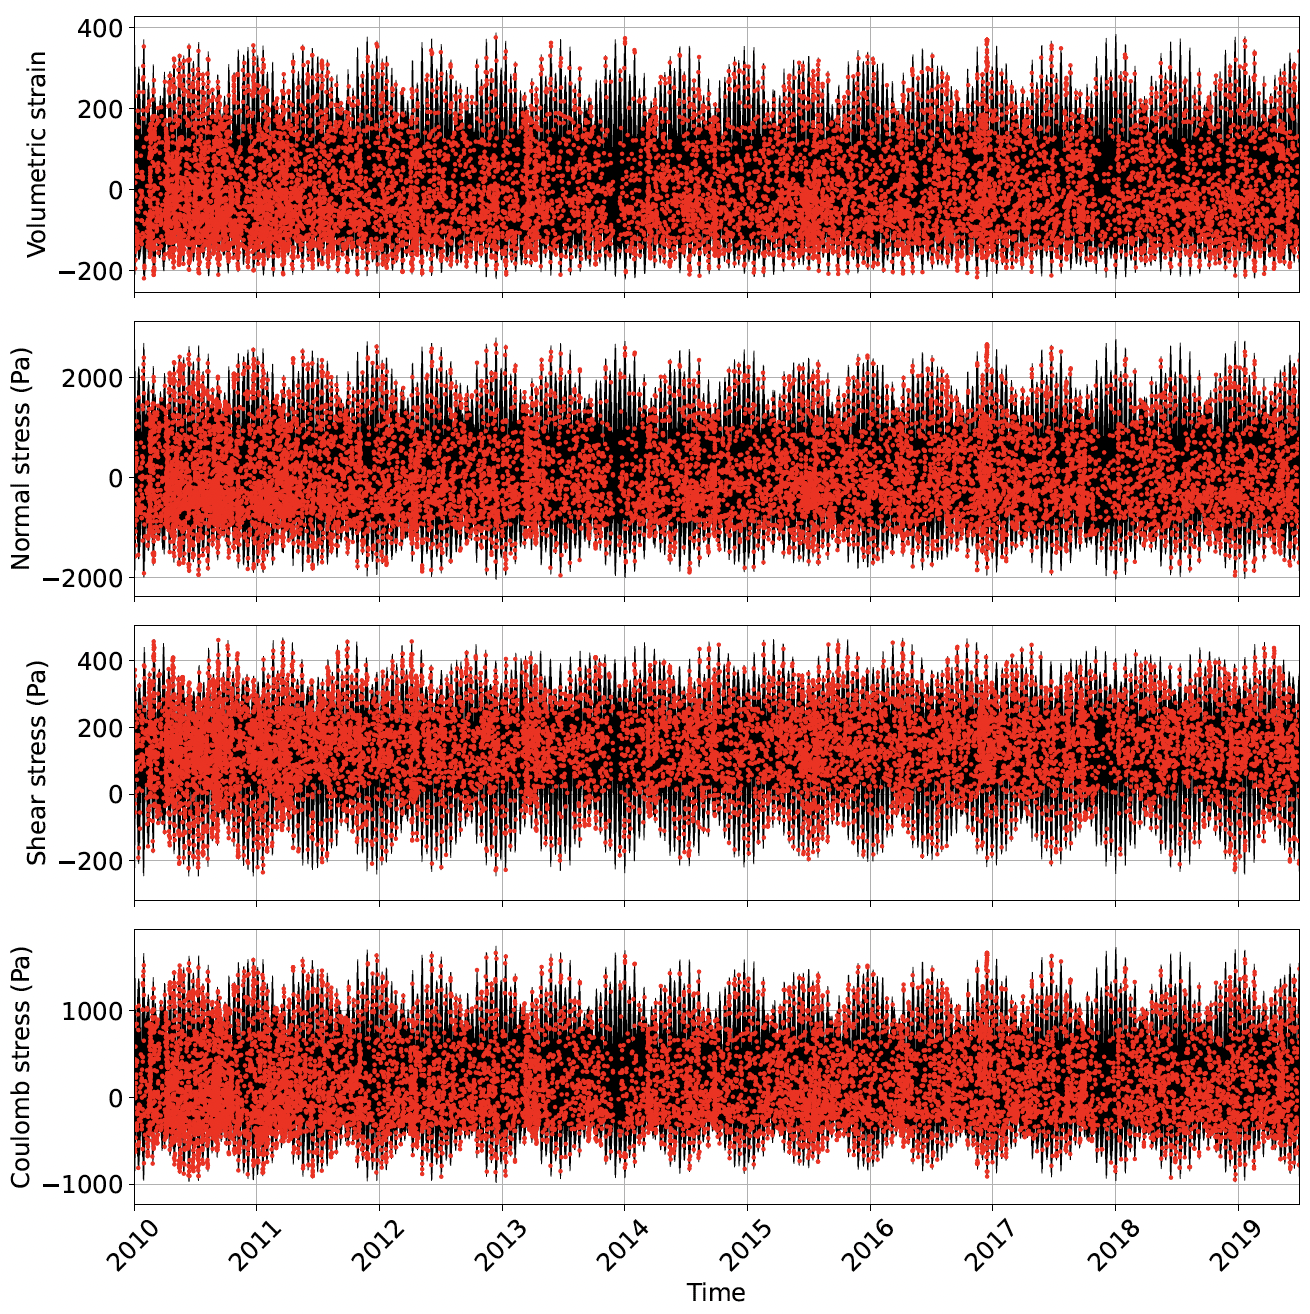

    (5) Analysis | Entire region

In [53]:
!python ex_ana2_entire_region.py

src_path = /content/TiMEpy/ex_ridgecrest/TiMEpy/TiMEpy/ex_ridgecrest/TiMEpy/config
====== Analysis | Entire region: Start ======
Loading observational data (txt files)
Loading reference data (txt files)
Fitted amplitude = 0.055
Fitted phase_shift = -77.443 deg
Fitted amplitude = 0.037
Fitted phase_shift = 91.036 deg
Fitted amplitude = 0.053
Fitted phase_shift = -80.939 deg
Fitted amplitude = 0.065
Fitted phase_shift = -60.573 deg
Estimated a: 0.04989239123007684 with delta: 0.03505361469418102
Estimated C: 0.1521946748501831 with delta: 0.0028389863607882642
Estimated a: 0.0688528459322297 with delta: 0.14168193269536591
Estimated C: 0.15189477344201696 with delta: 0.004103908071407261
Estimated a: 0.028023738771786422 with delta: 0.020181610749257877
Estimated C: 0.15330077680935356 with delta: 0.0027159661939578942
Estimated a: 0.2479081033403533 with delta: 0.1474506765979004
Estimated C: 0.1533617492938483 with delta: 0.002714548534906241
Fitted amplitude = 0.055
Fitted phase_shift

    (6) Analysis | Temporal variation

In [37]:
!python ex_ana3_temp_variation.py

src_path = /content/TiMEpy/ex_ridgecrest/TiMEpy/TiMEpy/config
====== Analysis | Temporal variation: Start ======
Loading observational data (txt files)
Loading reference data (txt files)
Fitted amplitude = 0.024
Fitted phase_shift = 74.536 deg
Fitted amplitude = 0.048
Fitted phase_shift = -119.306 deg
Fitted amplitude = 0.052
Fitted phase_shift = -99.316 deg
Fitted amplitude = 0.060
Fitted phase_shift = -103.371 deg
Estimated a: 0.11807360668142546 with delta: 0.21019276517541438
Estimated C: 0.18825402059863394 with delta: 0.00746855289658032
Estimated a: -0.005122158326059313 with delta: 0.029641713404617777
Estimated C: 0.1914373109121425 with delta: 0.0050729583568378785
Estimated a: -0.053684788069918374 with delta: 0.21863135132684747
Estimated C: 0.1913229966980112 with delta: 0.005069661781294827
Estimated a: -0.00948422513012079 with delta: 0.050876283684445016
Estimated C: 0.19182877419357547 with delta: 0.005287052862423427
Fitted amplitude = 0.025
Fitted phase_shift = 61.55

(7)